In [13]:
#Download neccessary packages
import numpy as np
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
import scipy
from scipy import stats

Create a matrix with information of the amount of each type of protocadherin in each neuron. In the model below, there are 3 types of protocadherins

In [14]:
#Assign variables                                 
num_neurons = 872        #number of neurons
num_pdch = 100           #total number of Pdch per neuron
cycle = 53               #Aamount of pdch types   

#Assign random combination of Pdch amounts to a neuron so total pdch adds up to a total, i.e 100. 

def random_assigment(n, total):                                  #n = how many pdch types, #total = total pdch amount
    dividers = sorted(random.sample(range(0, total), n+1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

input_layer = np.arange(0,784)    #Separate all the neurons in the matrix with Pdch information into their layers
inner_layer = np.arange(784, 862)
output_layer = np.arange(862, 872)

avg_l2 = []
avg_out = []
avg_l2norm = []
avg_outnorm = []

std_l2 = []
std_out = []
std_l2norm = []
std_outnorm = []

types = 1
for a in range(cycle):                #For every Pdch type amount (29 time since 1 Pdch type amount doesn't count)
    types = types+1
    matrix = np.zeros((num_neurons, types))  #Generate empty matrix to store Pdch information
    x = -1
    for i in range(num_neurons):                                   
        x = x + 1
        y = -1
        random_vector = random_assigment(types, num_pdch)  #Assign random amounts for each Pdch type
        for j in range(types):
            y = y + 1      
            matrix[x][y] = random_vector[y]


    #Normalize vector
    matrix = matrix/np.sum(matrix)

    #Create Ecludian distance matrix between neurons in input and inner layer
    distance_l2 = np.zeros((78, 784))       #78 neurons in inner layer and 784 in input

    a = -1
    for i in range(78):
        a = a + 1
        b = -1
        for j in range(784):
            b = b + 1
            Ecl_distance = norm(matrix[input_layer[b]]- matrix[inner_layer[a]]) #Calculate ecludian distance
            distance_l2[a][b] =  Ecl_distance

    #Create Ecludian distance matrix between neurons in inner layer and output layer
    distance_out = np.zeros((10, 78))       #78 neurons in inner layer and 10 in ouput

    c = -1
    for i in range(10):
        c = c + 1
        d = -1
        for j in range(78):
            d = d + 1
            Ecl_distance = norm(matrix[inner_layer[d]]- matrix[output_layer[c]]) #Ecludian distance
            distance_out[c][d] = Ecl_distance
            
    #Calculate average
    avg_l2.append(np.average(distance_l2))
    avg_out.append(np.average(distance_out))
    
    std_l2.append(np.std(distance_l2))
    std_out.append(np.std(distance_out))
        
    #normalize between 0 to 1
    #Find unique values of matrices
    unique_dl2 = np.unique(distance_l2)
    unique_dout = np.unique(distance_out)

    #Find max value of matrices
    maxdl2 = max(unique_dl2)
    maxdout = max(unique_dout)
    
    #determine the highest maximum of the two matrices combined
    if maxdl2 >= maxdout:                    
        maxvalue = maxdl2
    else: 
         maxvalue = maxdout

    #Find min value of matrices
    mindl2 = min(unique_dl2)
    mindout = min(unique_dout)

    #determine the min the two matrices combined
    if mindl2 >= mindout:                    
        minvalue = mindout
    else: 
        minvalue = mindl2 
        
    distance_l2 = (distance_l2 - minvalue)/(maxvalue - minvalue)
    distance_out = (distance_out - minvalue)/(maxvalue - minvalue)
    
    #distance_l2 = (distance_l2 - distance_l2.min())/(distance_l2.max()-distance_l2.min())
    #distance_out = (distance_out - distance_out.min())/(distance_out.max()-distance_out.min())

    #average of normalized distances for each matrix
    avg_l2norm.append(np.average(distance_l2))
    avg_outnorm.append(np.average(distance_out))
    
    std_l2norm.append(np.std(distance_l2))
    std_outnorm.append(np.std(distance_out))

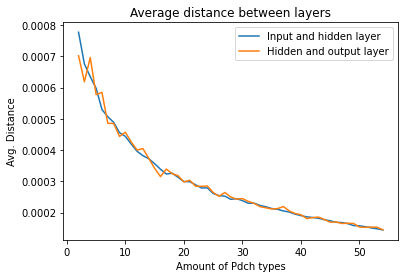

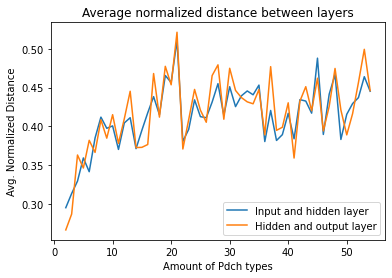

As, the amount of Pdch types increases, the amount of neurons that are similiar decreases


In [15]:
x = np.arange(2,cycle+2)

plt.plot(x, avg_l2, label = "Input and hidden layer")
plt.plot(x, avg_out, label = "Hidden and output layer")
plt.title('Average distance between layers') #level of dissimilarity
plt.xlabel('Amount of Pdch types')
plt.ylabel('Avg. Distance')
plt.legend()
plt.show()

plt.plot(x, avg_l2norm, label = "Input and hidden layer")
plt.plot(x, avg_outnorm, label = "Hidden and output layer")
plt.title('Average normalized distance between layers') #level of dissimilarity
plt.xlabel('Amount of Pdch types')
plt.ylabel('Avg. Normalized Distance')
plt.legend()
plt.show()

print("As, the amount of Pdch types increases, the amount of neurons that are similiar decreases")

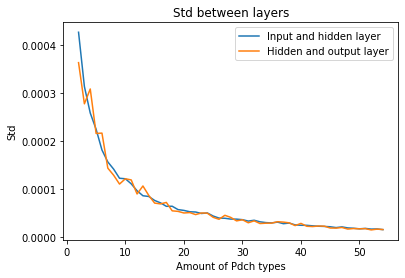

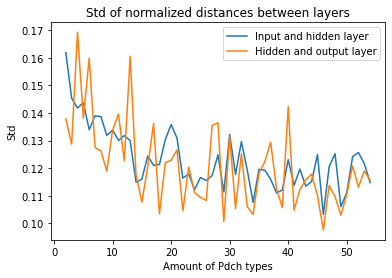

Since more neurons are becoming less similar, there is a less wide distribution of similiarity


In [16]:
plt.plot(x, std_l2, label = "Input and hidden layer")
plt.plot(x, std_out, label = "Hidden and output layer")
plt.title('Std between layers') #level of dissimilarity
plt.xlabel('Amount of Pdch types')
plt.ylabel('Std')
plt.legend()
plt.show()

plt.plot(x, std_l2norm, label = "Input and hidden layer")
plt.plot(x, std_outnorm, label = "Hidden and output layer")
plt.title('Std of normalized distances between layers') #level of dissimilarity
plt.xlabel('Amount of Pdch types')
plt.ylabel('Std')
plt.legend()
plt.show()

print("Since more neurons are becoming less similar, there is a less wide distribution of similiarity")

In [18]:
from scipy.stats import mannwhitneyu

#Determine if there is a difference between layers
dp = mannwhitneyu(avg_l2, avg_out)
stdp = mannwhitneyu(std_l2, std_out)
print(dp, stdp)

#Determine if there is a correlation between Pdch types and Avg. distance --> Pearson Correlation
#Avg.distance:
d_correlationl2 = scipy.stats.pearsonr(x, avg_l2norm)
d_correlationout = scipy.stats.pearsonr(x, avg_outnorm)

print(d_correlationl2, d_correlationout)

if d_correlationl2[1] <= 0.05:
    print("There is a signiifcant correlation between amount of Pdch types and Avg. normalized distance (l2)")
if d_correlationout[1] <= 0.05:
    print("There is a signiifcant correlation between amount of Pdch types and Avg. normalized distance (out)")

#Std:
s_correlationl2 = scipy.stats.pearsonr(x, std_l2norm)
s_correlationout = scipy.stats.pearsonr(x, std_outnorm)
print(s_correlationl2, s_correlationout)

if s_correlationl2[1] <= 0.05:
    print("There is a signiifcant correlation between amount of Pdch types and Std(l2)")
if s_correlationout[1] <= 0.05:
    print("There is a signiifcant correlation between amount of Pdch types and Std(out)")


MannwhitneyuResult(statistic=1393.0, pvalue=0.47229385814315294) MannwhitneyuResult(statistic=1367.0, pvalue=0.4075742871571716)
(0.5107994769770345, 9.304103402870395e-05) (0.47776341107930187, 0.00029715713338427)
There is a signiifcant correlation between amount of Pdch types and Avg. normalized distance (l2)
There is a signiifcant correlation between amount of Pdch types and Avg. normalized distance (out)
(-0.6605130179558838, 7.383843963945614e-08) (-0.5334834569423067, 3.9010199715468366e-05)
There is a signiifcant correlation between amount of Pdch types and Std(l2)
There is a signiifcant correlation between amount of Pdch types and Std(out)
